In [81]:
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [82]:
train_mnist = datasets.MNIST(r'C:\Users\777\PycharmProjects\uchuneyronki\PATH_TO_STORE_TESTSET\MNIST', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
test_mnist = datasets.MNIST(r'C:\Users\777\PycharmProjects\uchuneyronki\PATH_TO_STORE_TESTSET\MNIST', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

# Параметры обучения FCN MLP

In [245]:
num_epochs = 10
batch_size = 32
learning_rate = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [84]:
train_dataloader = DataLoader(train_mnist, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_mnist, batch_size=batch_size, shuffle=False)

In [85]:
for data in train_dataloader:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Батч из 32ух пар тензоров, где в первые-яркости пикселей, а вторые- метки

In [86]:
print('Количество картинок в обучающей выборке:', sum([1 for data in train_mnist]))
print('Количество картинок в тестовой выборке:', sum([1 for data in test_mnist]))

Количество картинок в обучающей выборке: 60000
Количество картинок в тестовой выборке: 10000


In [87]:
X, y = data[0][0], data[1][0]

In [88]:
print(X, y)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Text(0.5, 1.0, 'tensor(1)')

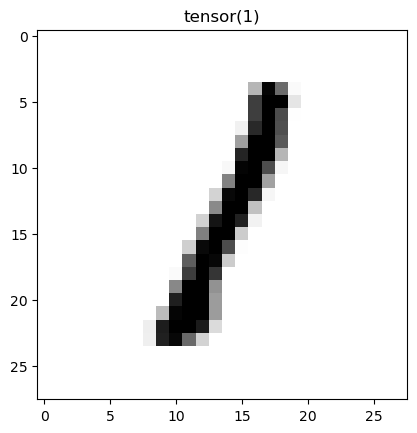

In [89]:
plt.imshow(X.view(28, 28), cmap='gray_r')
plt.title(y)

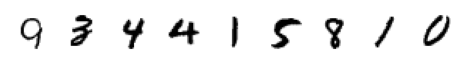

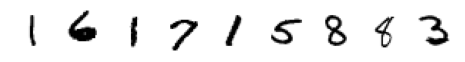

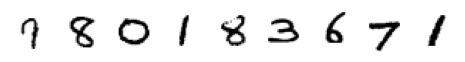

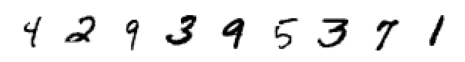

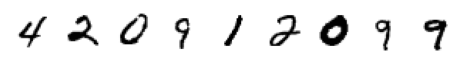

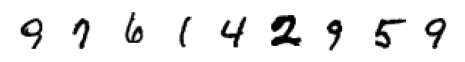

In [90]:
for _ in range(6):
    images, labels = next(iter(train_dataloader))
    figure = plt.figure()
    for index in range(1, 10):
        plt.subplot(1, 10, index)
        plt.axis('off')
        plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Процентоное соотношение цифры 0 от общего кол-ва цифр: 9.871666666666666%
Процентоное соотношение цифры 1 от общего кол-ва цифр: 11.236666666666666%
Процентоное соотношение цифры 2 от общего кол-ва цифр: 9.93%
Процентоное соотношение цифры 3 от общего кол-ва цифр: 10.218333333333334%
Процентоное соотношение цифры 4 от общего кол-ва цифр: 9.736666666666666%
Процентоное соотношение цифры 5 от общего кол-ва цифр: 9.035%
Процентоное соотношение цифры 6 от общего кол-ва цифр: 9.863333333333333%
Процентоное соотношение цифры 7 от общего кол-ва цифр: 10.441666666666666%
Процентоное соотношение цифры 8 от общего кол-ва цифр: 9.751666666666667%
Процентоное соотношение цифры 9 от общего кол-ва цифр: 9.915%


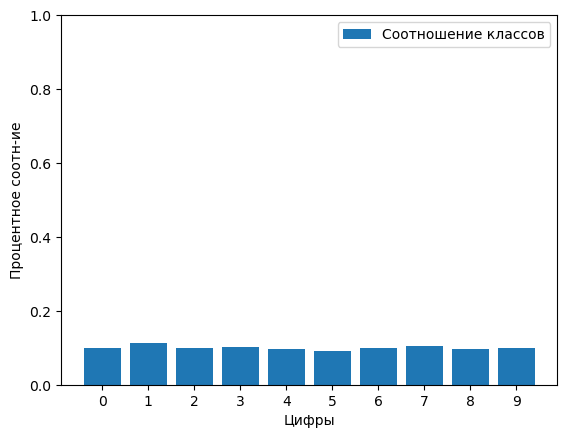

In [91]:
total = 0
dic_count = {int(i): 0 for i in range(10)}
for dat in train_dataloader:
    tens, mark = dat
    for y in mark:
        dic_count[int(y)] += 1
        total += 1
print(dic_count)
for k, v in dic_count.items():
    print(f'Процентоное соотношение цифры {k} от общего кол-ва цифр: {v*100/total}%')
keys = dic_count.keys()
vals = dic_count.values()
plt.bar(keys, np.divide(list(vals), sum(vals)), label="Соотношение классов")
plt.ylim(0,1)
plt.ylabel("Процентное соотн-ие")
plt.xlabel("Цифры")
plt.xticks(list(keys))
plt.legend()
plt.show()

Так как набор данных предварительно обработан, то наблюдаем сбалансированность данных, следовательно прибегать к дополнительным методам не придется

In [256]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation=nn.ReLU()):
        super().__init__()
        self.flatten = nn.Flatten()
        self.activation = activation
        self.layers_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            self.activation,
            nn.Linear(512, 256),
            self.activation,
            nn.Linear(256, 128),
            self.activation,
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

In [257]:
model = NeuralNetwork().to(device)

In [260]:
from torchvision import models
from torchsummary import summary
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
              ReLU-4                  [-1, 512]               0
            Linear-5                  [-1, 256]         131,328
              ReLU-6                  [-1, 256]               0
              ReLU-7                  [-1, 256]               0
            Linear-8                  [-1, 128]          32,896
              ReLU-9                  [-1, 128]               0
             ReLU-10                  [-1, 128]               0
           Linear-11                   [-1, 10]           1,290
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

Архитектура ИНС имеет следующий вид: 784 входа, которые равны количеству пикселей в изображении, 3 скрытых слоя по 512, 256 и 128 нейронов соответственно. В качестве функции активации используется ReLU, которая имеет вид
![image](ReLUpic.jpg)
Всего в модели 567434 рассчитываемых параметров

In [234]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [235]:
def train_loop(dataloader, model, loss_function, optimizer):
    num_batches = len(dataloader)

    train_loss = 0

    for imgs, labels in dataloader:
        # предсказание и расчет потерь
        pred = model(imgs.to(device))
        loss = loss_function(pred, labels.to(device))

        # оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= num_batches
    print(f"Потери обучения: {train_loss:>8f}")

    return train_loss


def test_loop(dataloader, model, loss_function):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, correct = 0, 0

    with torch.no_grad():
        for imgs, labels in dataloader:
            # Compute prediction and loss
            pred = model(imgs.to(device))
            loss = loss_function(pred, labels.to(device))

            test_loss += loss.item()
            correct += (
                (pred.argmax(1) == labels.to(device)).type(torch.float).sum().item()
            )

    test_loss /= num_batches
    correct /= size
    print(f"Потери на тестовых данных: {test_loss:>8f}, Точность модели на тестовых данных: {(100*correct):>0.1f}% \n")

    return test_loss

In [236]:
# обучение модели и построение графика обучения
loss_history = {"train": [], "test": []}
start_time = time.time()
num_epochs = 60
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 2.298677
Потери на тестовых данных: 2.290875, Точность модели на тестовых данных: 15.3% 

Эпоха номер 2
Потери обучения: 2.281110
Потери на тестовых данных: 2.268683, Точность модели на тестовых данных: 32.0% 

Эпоха номер 3
Потери обучения: 2.250961
Потери на тестовых данных: 2.225531, Точность модели на тестовых данных: 55.0% 

Эпоха номер 4
Потери обучения: 2.182272
Потери на тестовых данных: 2.115235, Точность модели на тестовых данных: 58.9% 

Эпоха номер 5
Потери обучения: 1.982181
Потери на тестовых данных: 1.778432, Точность модели на тестовых данных: 62.0% 

Эпоха номер 6
Потери обучения: 1.492271
Потери на тестовых данных: 1.179454, Точность модели на тестовых данных: 71.2% 

Эпоха номер 7
Потери обучения: 0.993686
Потери на тестовых данных: 0.825726, Точность модели на тестовых данных: 76.6% 

Эпоха номер 8
Потери обучения: 0.759053
Потери на тестовых данных: 0.674890, Точность модели на тестовых данных: 80.1% 

Эпоха номер 9
Потери обучения: 0

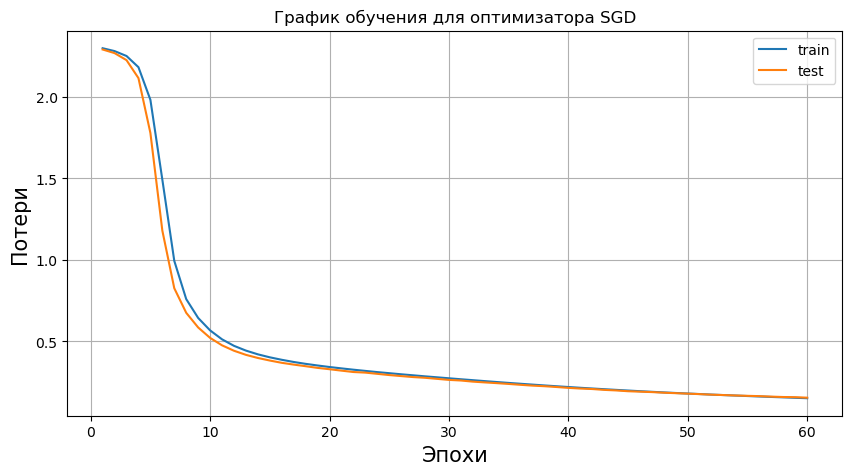

In [237]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.legend()
plt.grid()
plt.title("График обучения для оптимизатора SGD")
plt.show()

In [1]:
class NeuralNetwork(nn.Module):
    def __init__(self, activation=nn.ReLU()):
        super().__init__()
        self.flatten = nn.Flatten()
        self.activation = activation
        self.layers_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            self.activation,
            nn.Linear(512, 256),
            self.activation,
            nn.Linear(256, 128),
            self.activation,
            nn.Linear(128, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

NameError: name 'nn' is not defined

In [101]:
model = NeuralNetwork().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [102]:
loss_history = {"train": [], "test": []}
start_time = time.time()
num_epochs = 7
learning_rate = 0.001
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 0.227317
Потери на тестовых данных: 0.110585, Точность модели на тестовых данных: 96.7% 

Эпоха номер 2
Потери обучения: 0.090601
Потери на тестовых данных: 0.084468, Точность модели на тестовых данных: 97.4% 

Эпоха номер 3
Потери обучения: 0.065216
Потери на тестовых данных: 0.077256, Точность модели на тестовых данных: 97.8% 

Эпоха номер 4
Потери обучения: 0.047563
Потери на тестовых данных: 0.070589, Точность модели на тестовых данных: 98.0% 

Эпоха номер 5
Потери обучения: 0.039108
Потери на тестовых данных: 0.088389, Точность модели на тестовых данных: 97.5% 

Эпоха номер 6
Потери обучения: 0.032150
Потери на тестовых данных: 0.084663, Точность модели на тестовых данных: 97.9% 

Эпоха номер 7
Потери обучения: 0.029676
Потери на тестовых данных: 0.092684, Точность модели на тестовых данных: 97.9% 

Обучение завершнео за 7 эпох, затраченное время: 40.757 секунд


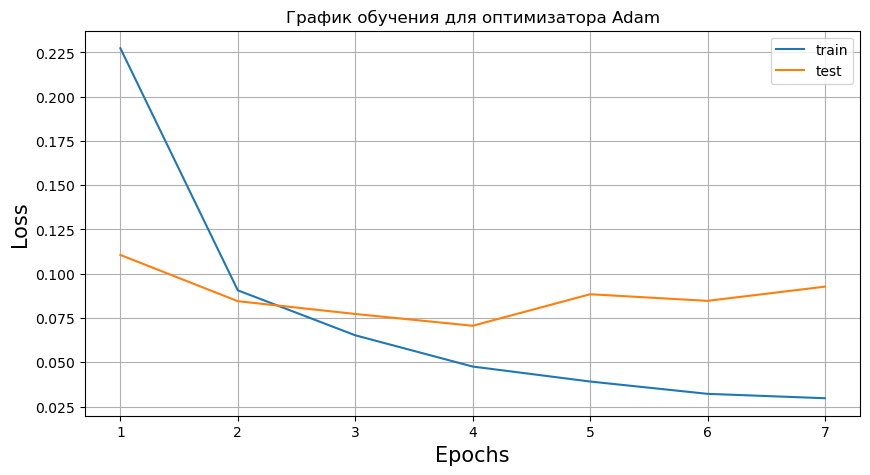

In [103]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.legend()
plt.grid()
plt.title("График обучения для оптимизатора Adam")
plt.show()

Используя оптимизатор Adam модель обучается быстрее и требует меньших вычислительных мощностей. В обоих случаях точность модели очень высокая.

In [115]:
imgs, labels = next(iter(test_dataloader))
pred = model(imgs.to(device))
imgs = torch.reshape(imgs, (32, 28, 28))
imgs = imgs[:32]
pred = pred[:32].detach()
print("Предсказание для первого образца:\n", pred[0])
digits = np.argmax(pred.cpu().numpy(), axis=1)
print("Предсказанный класс: ", digits[0])

Предсказание для первого образца:
 tensor([-15.2449,  -5.8718,  -3.4861,  -4.3508,  -4.5350,  -8.6863, -26.5910,
         14.3051,  -8.8988,   0.8650], device='cuda:0')
Предсказанный класс:  7


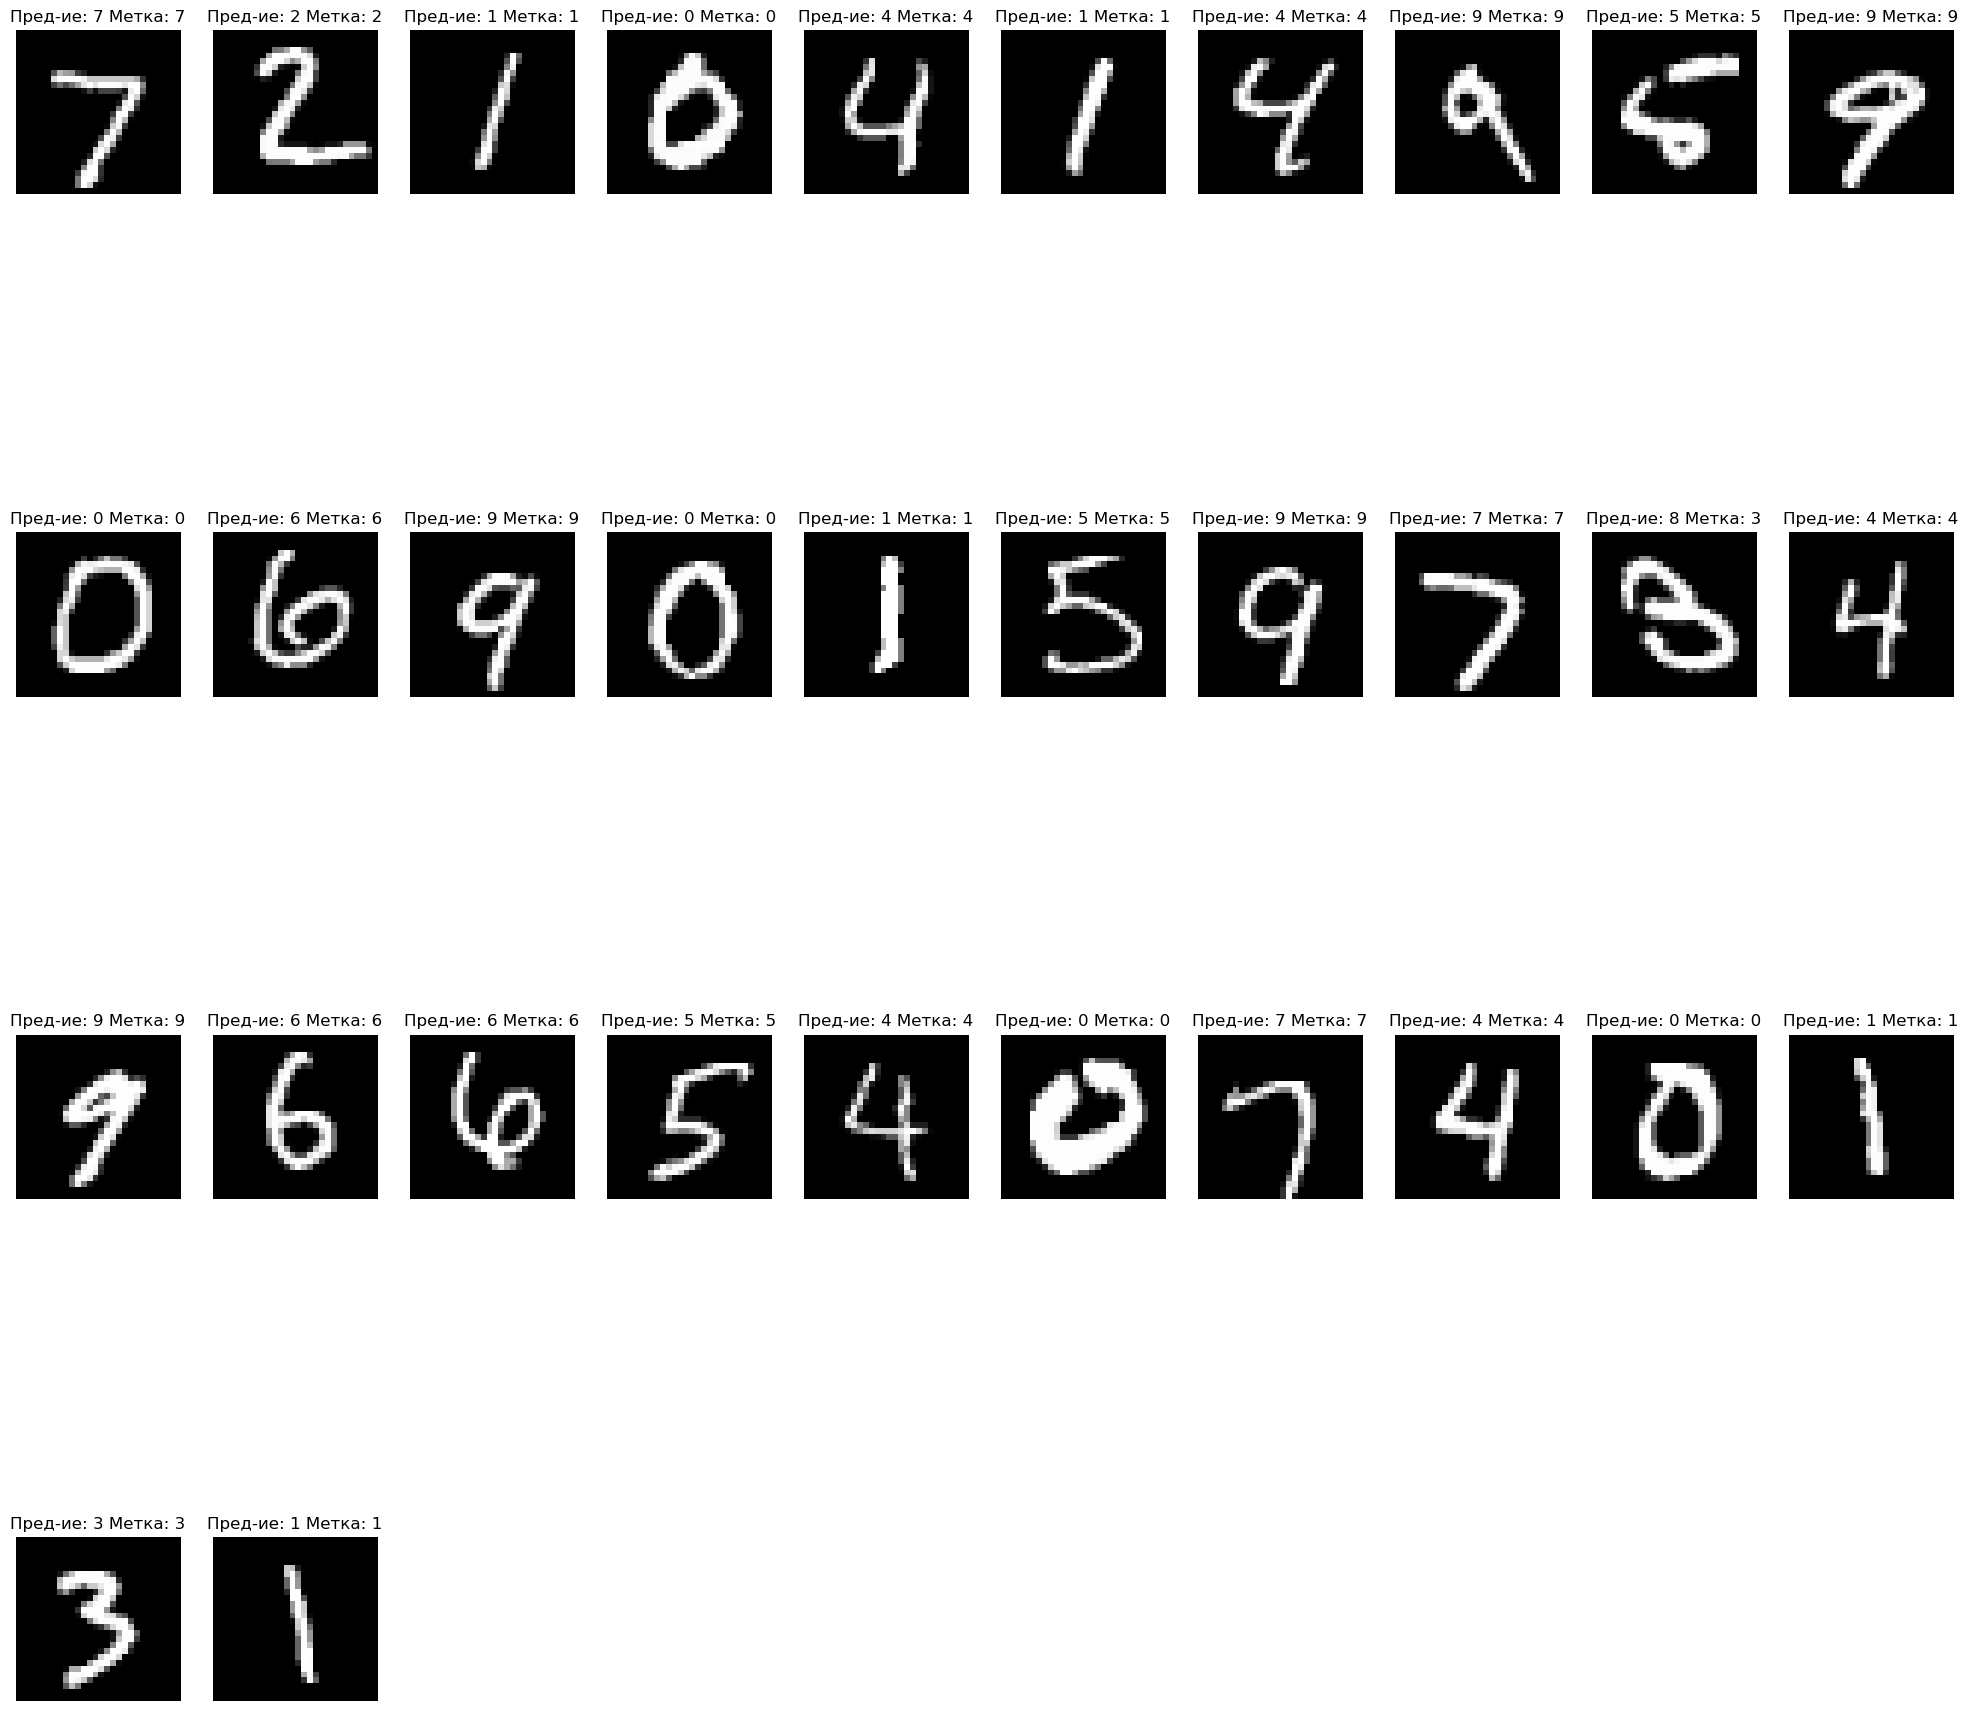

In [118]:
plt.figure(figsize=(25.0, 25.0))
for i in range(32):
    img = imgs[i]

    plt.subplot(4, 10, i + 1)
    plt.title(
        "Пред-ие: " + str(digits[i]) + " Метка: " + str(labels[i].numpy())
    )  # predicted and real values
    plt.axis("off")
    plt.imshow(img.numpy(), cmap="gray")

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import  recall_score
from sklearn.metrics import f1_score

In [238]:
net = model.to('cpu')
y_pred = []
y_true = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        X, y = data
        output = net(X.view(-1, 784))
        y_true += y.tolist()
        y_pred += torch.argmax(output, dim=1).tolist()
        for idx, i in enumerate(output):
             if torch.argmax(i) == y[idx]:
                 correct += 1
             total += 1
print(f'Accuracy: {round(accuracy_score(y_true, y_pred)*100, 2)}%')
print(f'Precision score: {round(precision_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'Recall score: {round(recall_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'f1 score: {round(f1_score(y_true, y_pred, average="macro")*100, 2)}%')

Accuracy: 95.36%
Precision score: 95.3%
Recall score: 95.33%
f1 score: 95.31%


In [133]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

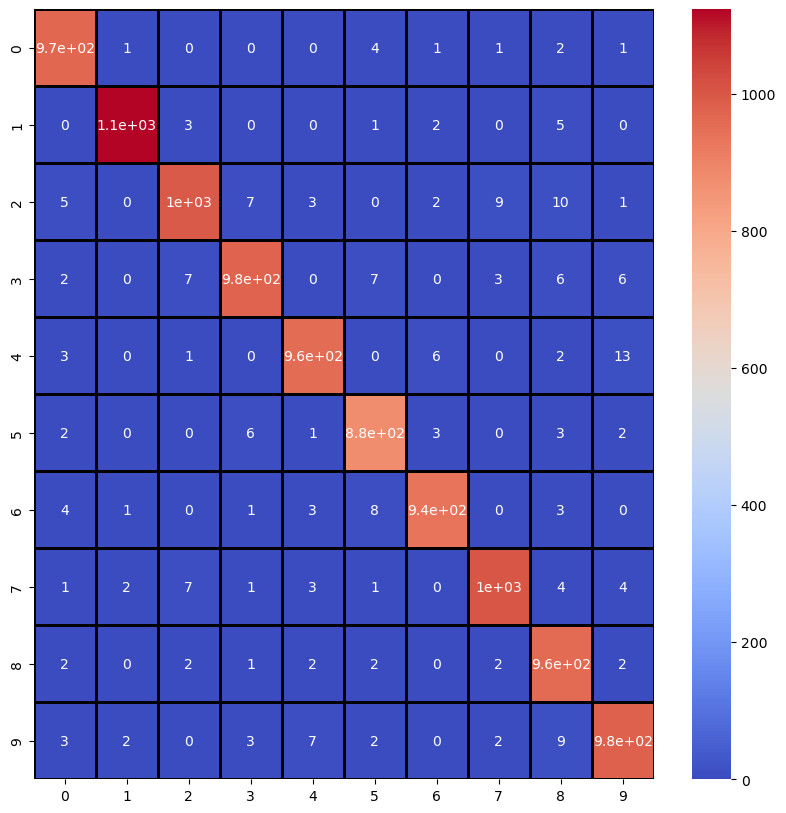

In [142]:
plt.figure(figsize=(10,10))
sb.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='coolwarm', linewidths=2, linecolor='black')
plt.show()

Наблюдаем очень хорошие показатели точности для обученной модели.

# Сверточная сеть для MNIST

In [218]:
num_epochs = 5
batch_size = 32
learning_rate = 1e-3
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [219]:
class CNN_model(nn.Module):
    def __init__(self):
        super(CNN_model, self).__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),  # in channel=1, out=32
            nn.MaxPool2d(2),  # size [32,14,14]
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1),  # in channel=32, out=32
            nn.MaxPool2d(2),  # size [32,7,7]
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, 100),  # in = channel*heght*width
            nn.ReLU(),
            nn.Linear(100, 10),
        )

    def forward(self, x):
        x = self.conv_stack(x)
        return x

In [220]:
model = CNN_model().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [159]:
print(model)

CNN_model(
  (conv_stack): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1568, out_features=100, bias=True)
    (8): ReLU()
    (9): Linear(in_features=100, out_features=10, bias=True)
  )
)


In [152]:
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
              ReLU-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]           9,248
         MaxPool2d-5             [-1, 32, 7, 7]               0
              ReLU-6             [-1, 32, 7, 7]               0
           Flatten-7                 [-1, 1568]               0
            Linear-8                  [-1, 100]         156,900
              ReLU-9                  [-1, 100]               0
           Linear-10                   [-1, 10]           1,010
Total params: 167,478
Trainable params: 167,478
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.37
Params size (MB): 0.64
Estimated T

Общая рхитектура сверточной нейронной сети представляет собой следующую картинку
![image](CONVpic.jpg)

В качестве функции активации я взял ReLU, ядро размера 3х3
Моя сеть похожа на представленную, за некоторыми исключениями:
1) Входное изображение имеет разрешение 28 х 28
2) Затем идет слой из 32 фильтров размера 28 х 28
3) Снижение размерности фильтров до 14 х 14
4) Слой с 32 фильтрами разрешением 14 х 14
5) Снижение размерности фильтров до 7 х 7
6) Слой из 100 нейронов
7) Слой из 10 выходных нейронов

In [221]:
def train_loop(dataloader, model, loss_function, optimizer):
    num_batches = len(dataloader)

    train_loss = 0

    for imgs, labels in dataloader:
        # предсказание и расчет потерь
        pred = model(imgs.to(device))
        loss = loss_function(pred, labels.to(device))

        # оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= num_batches
    print(f"Потери обучения: {train_loss:>8f}")

    return train_loss


def test_loop(dataloader, model, loss_function):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, correct = 0, 0

    with torch.no_grad():
        for imgs, labels in dataloader:
            # Compute prediction and loss
            pred = model(imgs.to(device))
            loss = loss_function(pred, labels.to(device))

            test_loss += loss.item()
            correct += (
                (pred.argmax(1) == labels.to(device)).type(torch.float).sum().item()
            )

    test_loss /= num_batches
    correct /= size
    print(f"Потери на тестовых данных: {test_loss:>8f}, Точность модели на тестовых данных: {(100*correct):>0.1f}% \n")

    return test_loss

In [180]:
loss_history = {"train": [], "test": []}
start_time = time.time()
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 0.173117
Потери на тестовых данных: 0.049705, Точность модели на тестовых данных: 98.5% 

Эпоха номер 2
Потери обучения: 0.052097
Потери на тестовых данных: 0.051829, Точность модели на тестовых данных: 98.4% 

Эпоха номер 3
Потери обучения: 0.036690
Потери на тестовых данных: 0.037716, Точность модели на тестовых данных: 98.8% 

Эпоха номер 4
Потери обучения: 0.027782
Потери на тестовых данных: 0.030369, Точность модели на тестовых данных: 99.0% 

Эпоха номер 5
Потери обучения: 0.021321
Потери на тестовых данных: 0.030417, Точность модели на тестовых данных: 99.1% 

Обучение завершнео за 5 эпох, затраченное время: 32.935 секунд


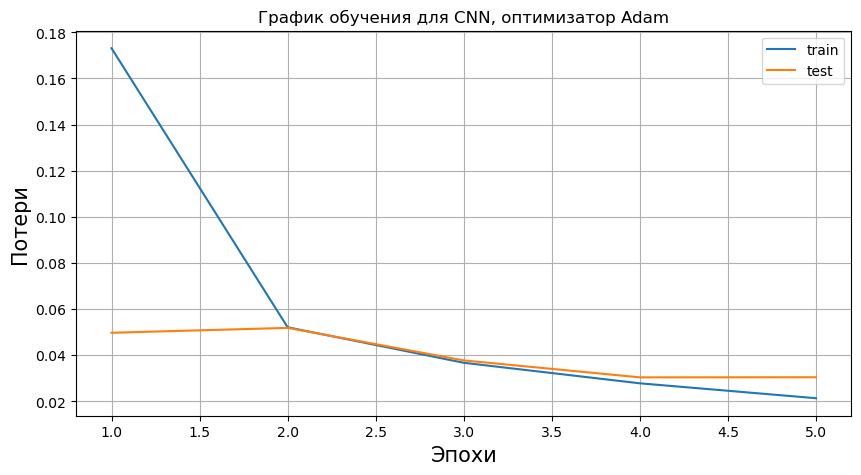

In [181]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.legend()
plt.grid()
plt.title("График обучения для CNN, оптимизатор Adam")
plt.show()

In [222]:
loss_history = {"train": [], "test": []}
start_time = time.time()
num_epochs = 20
for i in range(num_epochs):
    print(f"Эпоха номер {i+1}")
    train_loss = train_loop(train_dataloader, model, loss_function, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_function)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print(f"Обучение завершнео за {num_epochs} эпох, затраченное время: {round(time.time() - start_time, 3)} секунд")

Эпоха номер 1
Потери обучения: 2.256554
Потери на тестовых данных: 2.171112, Точность модели на тестовых данных: 45.4% 

Эпоха номер 2
Потери обучения: 1.689664
Потери на тестовых данных: 0.909592, Точность модели на тестовых данных: 77.9% 

Эпоха номер 3
Потери обучения: 0.630518
Потери на тестовых данных: 0.457900, Точность модели на тестовых данных: 87.5% 

Эпоха номер 4
Потери обучения: 0.417616
Потери на тестовых данных: 0.364507, Точность модели на тестовых данных: 89.4% 

Эпоха номер 5
Потери обучения: 0.353373
Потери на тестовых данных: 0.321140, Точность модели на тестовых данных: 90.6% 

Эпоха номер 6
Потери обучения: 0.318324
Потери на тестовых данных: 0.287922, Точность модели на тестовых данных: 91.7% 

Эпоха номер 7
Потери обучения: 0.292633
Потери на тестовых данных: 0.270508, Точность модели на тестовых данных: 91.9% 

Эпоха номер 8
Потери обучения: 0.271601
Потери на тестовых данных: 0.256279, Точность модели на тестовых данных: 92.4% 

Эпоха номер 9
Потери обучения: 0

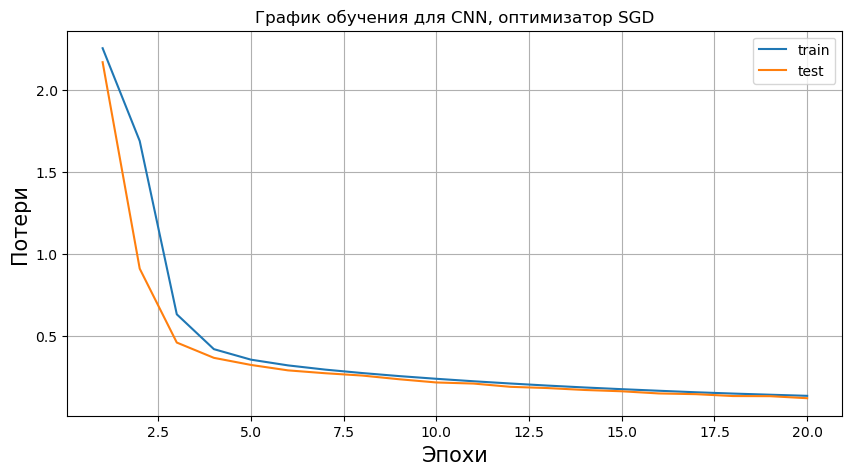

In [223]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history["train"], label="train")
plt.plot(range(1, num_epochs + 1), loss_history["test"], label="test")
plt.xlabel("Эпохи", fontsize=15)
plt.ylabel("Потери", fontsize=15)
plt.legend()
plt.grid()
plt.title("График обучения для CNN, оптимизатор SGD")
plt.show()

Обе модели имеют отличную точность, но оптимизатор Adam снова показал себя точнее и сократил время обучения и ресурсы.

In [182]:
imgs, labels = next(iter(test_dataloader))
pred = model(imgs.to(device))
imgs = torch.reshape(imgs, (32, 28, 28))
imgs = imgs[:32]
pred = pred[:32].detach()
print("Предсказание для первого образца:\n", pred[0])
digits = np.argmax(pred.cpu().numpy(), axis=1)
print("Предсказанный класс: ", digits[0])

Предсказание для первого образца:
 tensor([-14.4533, -10.5546,  -4.8780,  -0.4100,  -7.1686,  -7.8132, -26.3081,
         14.5980,  -6.6234,   2.2482], device='cuda:0')
Предсказанный класс:  7


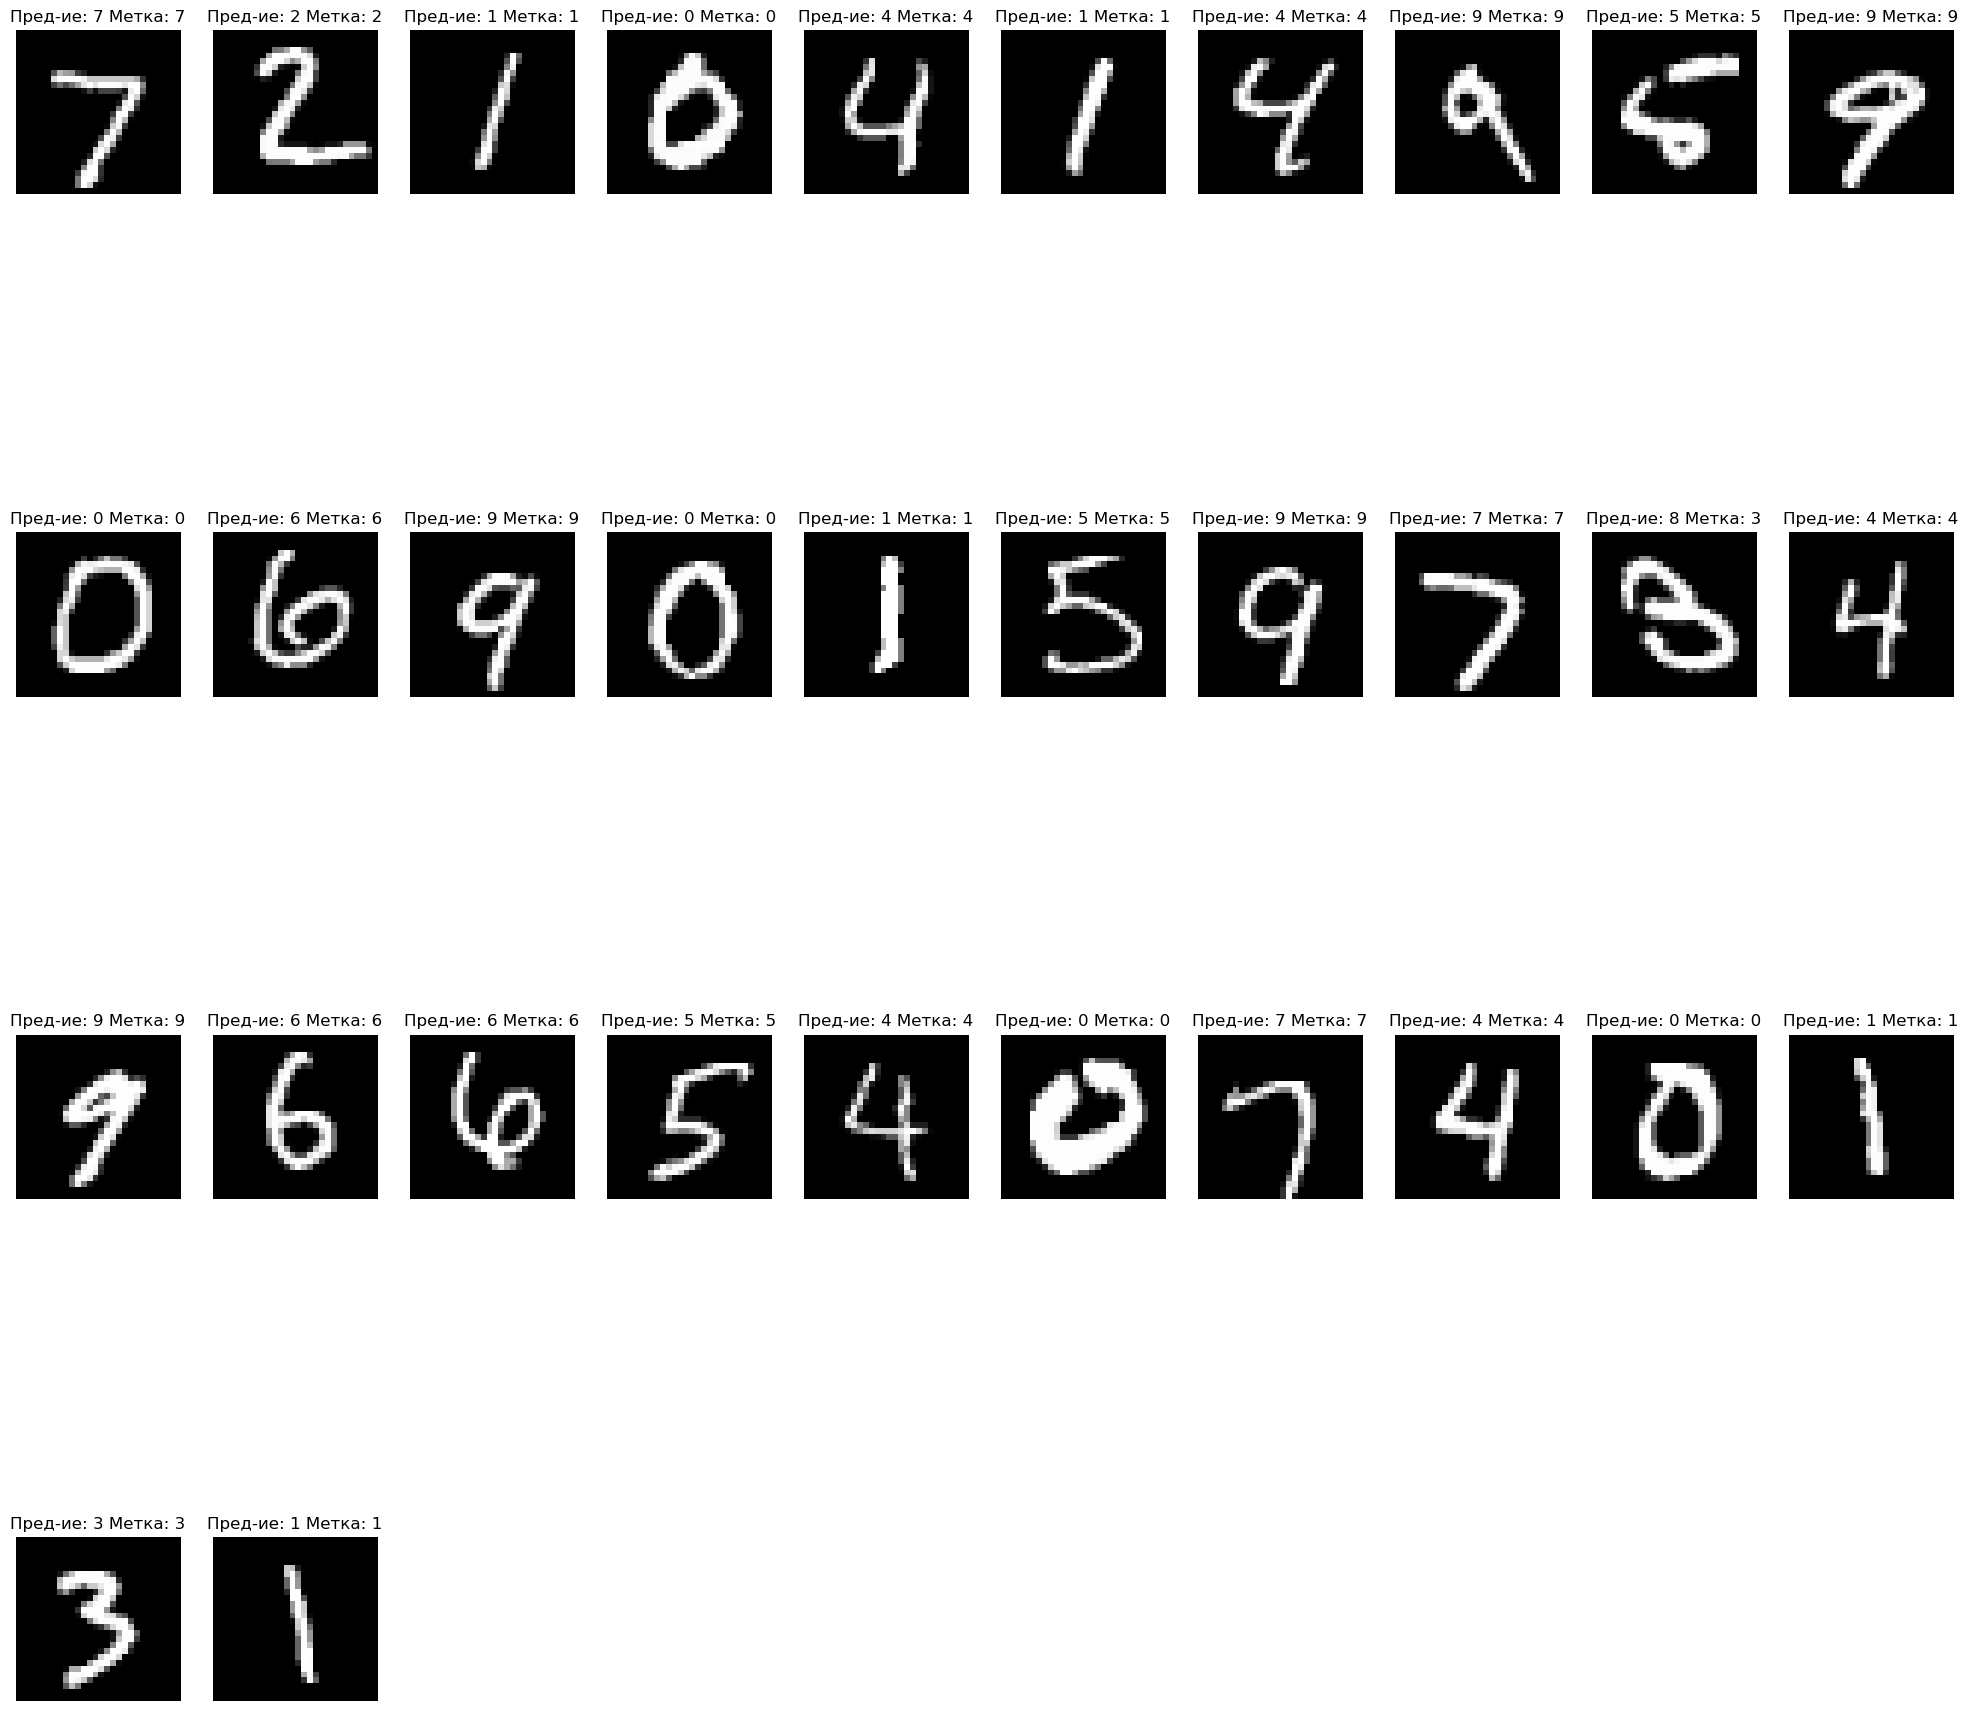

In [184]:
plt.figure(figsize=(25.0, 25.0))
for i in range(32):
    img = imgs[i]

    plt.subplot(4, 10, i + 1)
    plt.title(
        "Пред-ие: " + str(digits[i]) + " Метка: " + str(labels[i].numpy())
    )  # predicted and real values
    plt.axis("off")
    plt.imshow(img.numpy(), cmap="gray")

In [224]:
net = model.to('cpu')
y_pred = []
y_true = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        X, y = data
        output = net(X)
        y_true += y.tolist()
        y_pred += torch.argmax(output, dim=1).tolist()
        for idx, i in enumerate(output):
             if torch.argmax(i) == y[idx]:
                 correct += 1
             total += 1
print(f'Accuracy: {round(accuracy_score(y_true, y_pred)*100, 2)}%')
print(f'Precision score: {round(precision_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'Recall score: {round(recall_score(y_true, y_pred, average="macro")*100, 2)}%')
print(f'f1 score: {round(f1_score(y_true, y_pred, average="macro")*100, 2)}%')

Accuracy: 96.54%
Precision score: 96.54%
Recall score: 96.51%
f1 score: 96.51%


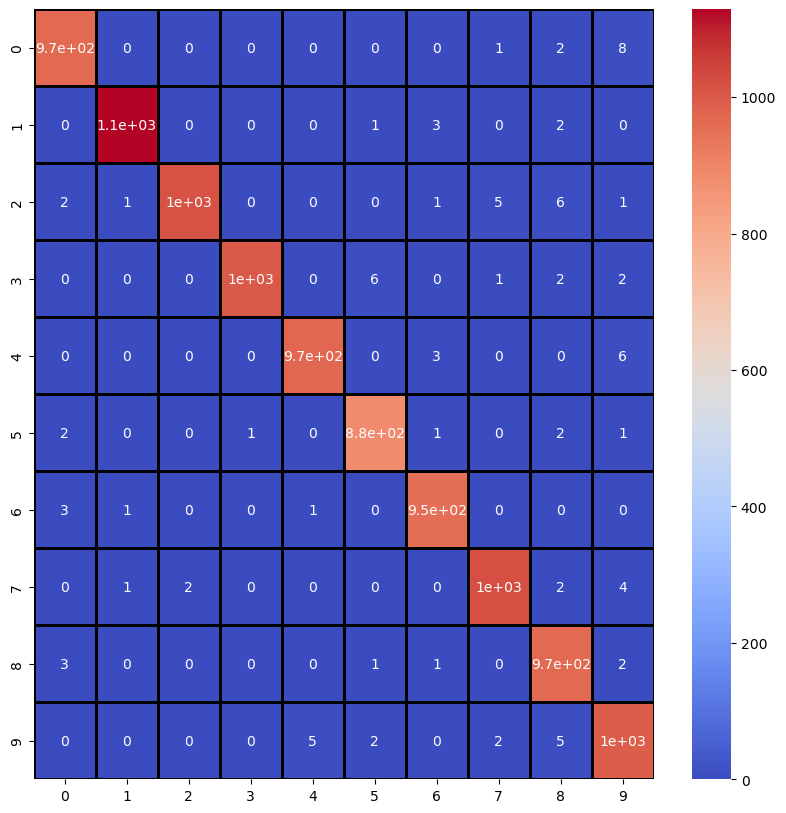

In [186]:
plt.figure(figsize=(10,10))
sb.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='coolwarm', linewidths=2, linecolor='black')
plt.show()

Матрица ошибок показывает нам сколько раз мы предсказали одну цифру как другую, например: мы предсказали 8 как 0 3 раза или 3 как 8 2 раза. По сути матрица ошибок представляют сырую форму всех показателей качества, из которой они могут быть вычислены.

In [239]:
df = pd.DataFrame({"Структура ИНС":["FCN MLP", "FCN MLP", "Conv. network", "Conv. network"], "Оптимизатор":["SGD","Adam", "SGD", "Adam"],"Train loss":["0,15","0,09","0,12","0,03"], "Accuracy":["95,36%", "97,85%","96,54%","99,05%"], "Precison":["95,31%", "97,83%","96,54%", "99,04%"], "Recall":["95,33%", "97,85%","96.51%", "99,05%"], "f1":["95,31%", "97,83%", "95,51%", "99,04%"]})

In [242]:
print(df.to_markdown(index=False))

| Структура ИНС   | Оптимизатор   | Train loss   | Accuracy   | Precison   | Recall   | f1     |
|:----------------|:--------------|:-------------|:-----------|:-----------|:---------|:-------|
| FCN MLP         | SGD           | 0,15         | 95,36%     | 95,31%     | 95,33%   | 95,31% |
| FCN MLP         | Adam          | 0,09         | 97,85%     | 97,83%     | 97,85%   | 97,83% |
| Conv. network   | SGD           | 0,12         | 96,54%     | 96,54%     | 96.51%   | 95,51% |
| Conv. network   | Adam          | 0,03         | 99,05%     | 99,04%     | 99,05%   | 99,04% |
